<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Multi_Class_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 37.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████| 300/300 [00:02<00:00, 142.79it/s]



📋 BoW + KNN Classification Report:

              precision    recall  f1-score   support

       Happy       1.00      0.85      0.92        20
         Sad       1.00      1.00      1.00        20
       Angry       0.87      1.00      0.93        20

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



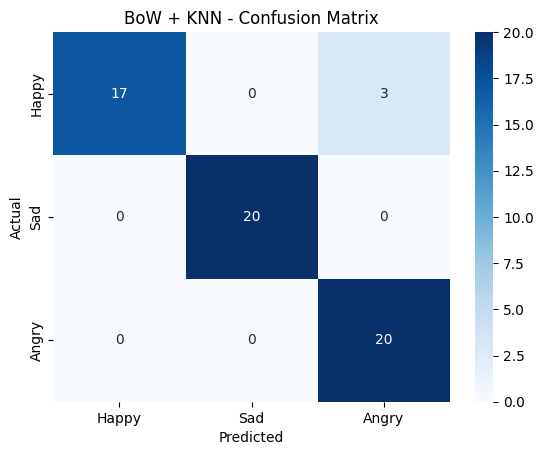


📋 TF-IDF + KNN Classification Report:

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        20
         Sad       1.00      1.00      1.00        20
       Angry       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



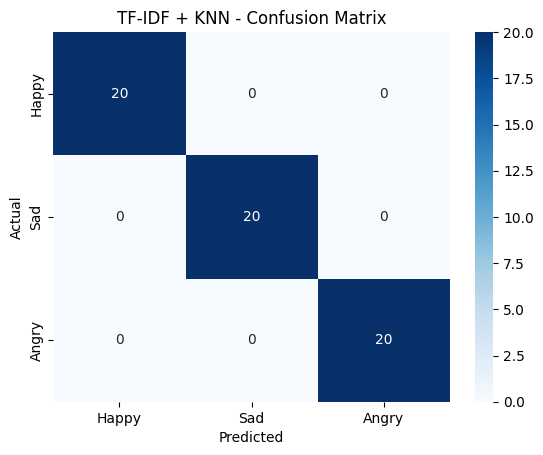


📋 Word Embeddings + KNN Classification Report:

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        20
         Sad       1.00      1.00      1.00        20
       Angry       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



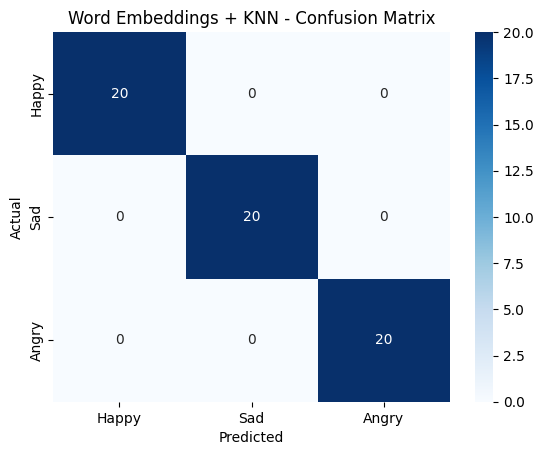

In [2]:
# 📦 Step 1: Import all required libraries
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 Load spaCy model with word vectors
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

# 🔧 Custom tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    return [tok.lemma_.lower().strip() for tok in doc if not tok.is_stop and not tok.is_punct]

# 🎭 Step 2: Generate synthetic emotion data (3 classes)
happy_templates = [
    "I feel so happy today!", "Life is beautiful.", "Joy is in the air.",
    "I'm smiling for no reason.", "What a wonderful moment!", "This makes me feel alive.",
    "I can't stop laughing.", "Such a great day!", "Everything feels just right.",
    "I'm so excited and grateful."
]
sad_templates = [
    "I feel so low.", "It's a sad day.", "Tears won't stop coming.",
    "My heart is heavy.", "I feel empty inside.", "Loneliness surrounds me.",
    "This pain won't go away.", "Crying quietly in my room.", "Nothing feels okay.",
    "I'm completely heartbroken."
]
angry_templates = [
    "I'm so angry right now.", "Why can't they understand!", "This is so unfair.",
    "I'm tired of this nonsense.", "He just crossed the line.", "I'm about to explode.",
    "Fuming with rage.", "This makes my blood boil.", "That was the last straw.",
    "I can't believe this happened!"
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(happy_templates))
    data["label"].append(0)  # happy
    data["message"].append(random.choice(sad_templates))
    data["label"].append(1)  # sad
    data["message"].append(random.choice(angry_templates))
    data["label"].append(2)  # angry

df_emotion = pd.DataFrame(data)

# 📐 Step 3: Vectorization
bow_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)

X_bow = bow_vectorizer.fit_transform(df_emotion["message"])
X_tfidf = tfidf_vectorizer.fit_transform(df_emotion["message"])
X_embed = np.array([nlp(text).vector for text in tqdm(df_emotion["message"])])

# 📊 Step 4: Train and evaluate KNN
def evaluate_and_report(X, y, k=3, title=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📋 {title} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Happy", "Sad", "Angry"]))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Happy", "Sad", "Angry"], yticklabels=["Happy", "Sad", "Angry"])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📌 Step 5: Run evaluations
evaluate_and_report(X_bow, df_emotion["label"], title="BoW + KNN")
evaluate_and_report(X_tfidf, df_emotion["label"], title="TF-IDF + KNN")
evaluate_and_report(X_embed, df_emotion["label"], title="Word Embeddings + KNN")

